# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


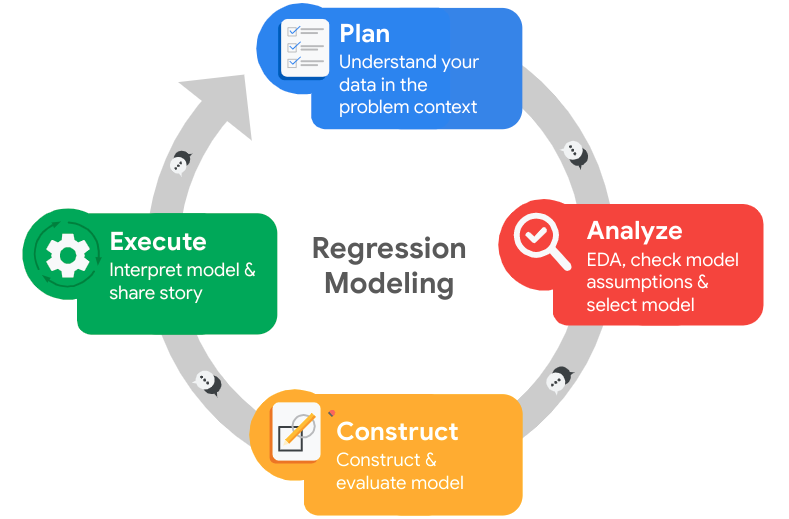

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project is the HR department of Salifort Motors.
2. In this problem, we are trying to create a model that will predict employees that are likely to quit the company, in the hope that this will reveal the factors that contribute to the employees being dissatisfied.
3. Initial observations are that many of the variables contribute directly to employee satisfaction, and there are a couple of mistakes in the variable names and some are not very clear.
4. In this stage, I find myself returning back to the Foundations in Data Science (Course 1) to get a refresher of the techniques and what I need for success.
5. At this time, I have no ethical concerns with the data or project task.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed

df0 = df0.rename(columns={'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident',
                          'Department': 'department',
                          'average_montly_hours': 'average_monthly_hours'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
duplicate = df0[df0.duplicated()]
duplicate

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

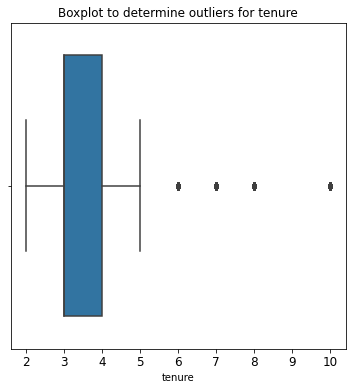

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to determine outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['tenure'])
plt.show()

In [13]:
# Determine the number of rows containing outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outliers = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    
    return outliers

outliers = find_outliers(df['tenure'])

# upper and lower limits of `tenure`
lower_limit = df['tenure'].quantile(0.25) - 1.5 * (df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25))
upper_limit = df['tenure'].quantile(0.75) + 1.5 * (df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25))


print('Lower limit:', lower_limit)
print('Upper limit', upper_limit)
print('Number of outliers:', str(len(outliers)))

Lower limit: 1.5
Upper limit 5.5
Number of outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Many of the variables are related to one another and it seems that `average_monthly_hours` is related to most of the variables in the dataset, but somehow not to `promotion_last_5years`. Employee satisfaction appears to be related to poor management and individuals not being rewarded for working long hours or remaining at the company for many years.
2. While there are significantly fewer employees who left the company (16% left); however, they were very affected by working long hours, having a lot of projects, and having low evaluation scores.
3. I transformed the data by renaming columns to make the names more clear and succinct. I also dropped duplicates from the data because they could affect the data and the model later on. 
4. EDA is necessary to get an overview of the data you are working with and to explore relationships in the data to pick the best variables for modeling.
5. I found myself turning to the Google Advanced Data Analytics Reference Guides for programming in Python, as well as the activity notebooks found throughout the course.
6. At this time, I have no ethical concerns.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed

print(df['left'].value_counts())
print()
# Get percentages of people who left vs. stayed

print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Number of projects histogram')

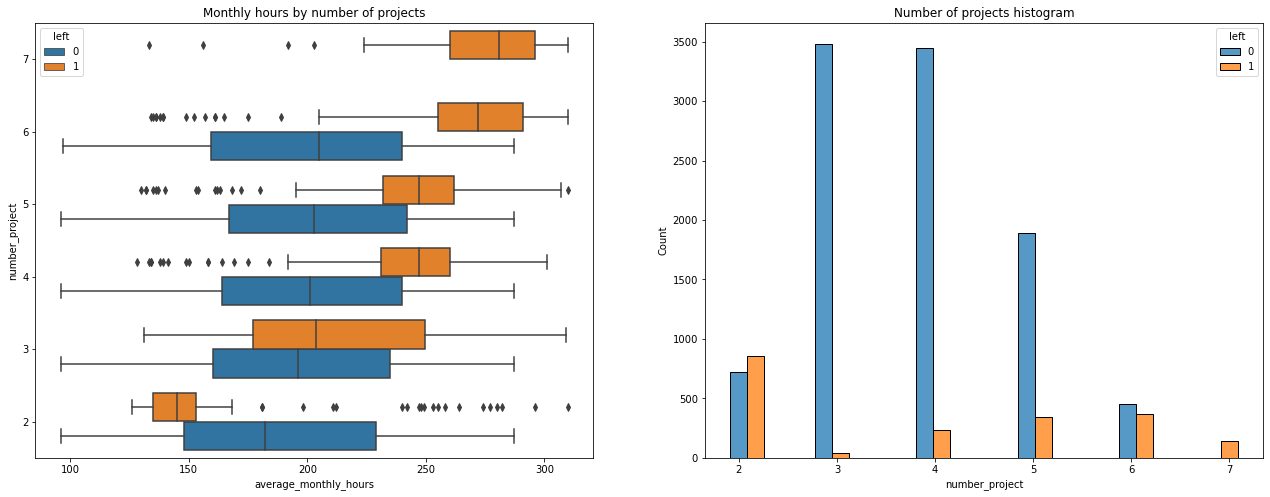

In [15]:
# Monthly hours by number of projects worked
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot
sns.boxplot(x = df['average_monthly_hours'], y = df['number_project'], hue = df['left'], orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

# histogram
sns.histplot(data = df, x = 'number_project', hue = 'left', multiple = 'dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram')

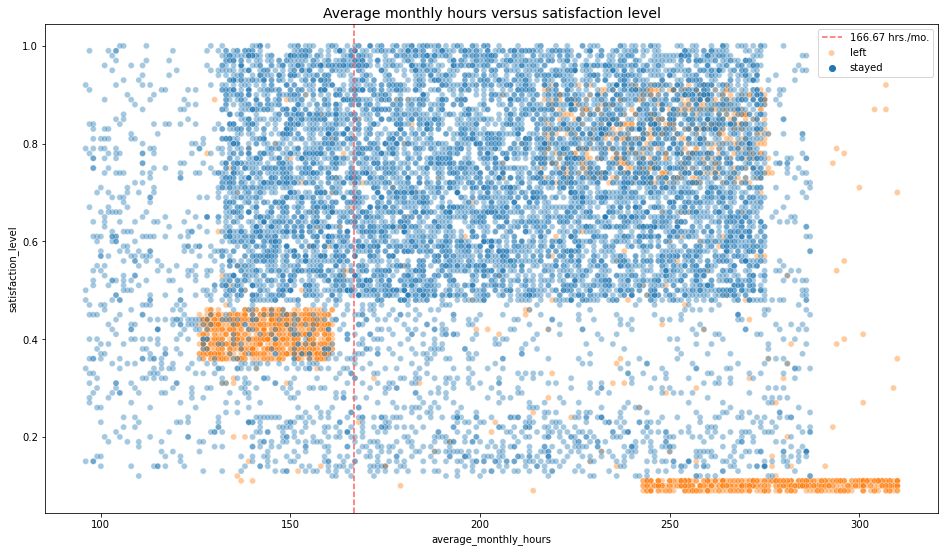

In [16]:
# Average monthly hours versus satisfaction level
plt.figure(figsize=(16,9))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', hue='left', alpha=0.4)
plt.title('Average monthly hours versus satisfaction level', fontsize=14)
# 166.67 is the ideal number of hours for an employee to work in a month, assuming they work
# 50 weeks a year (with a 2 week vacation), and 40 hours a week.
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])


Text(0.5, 1.0, 'Tenure histogram')

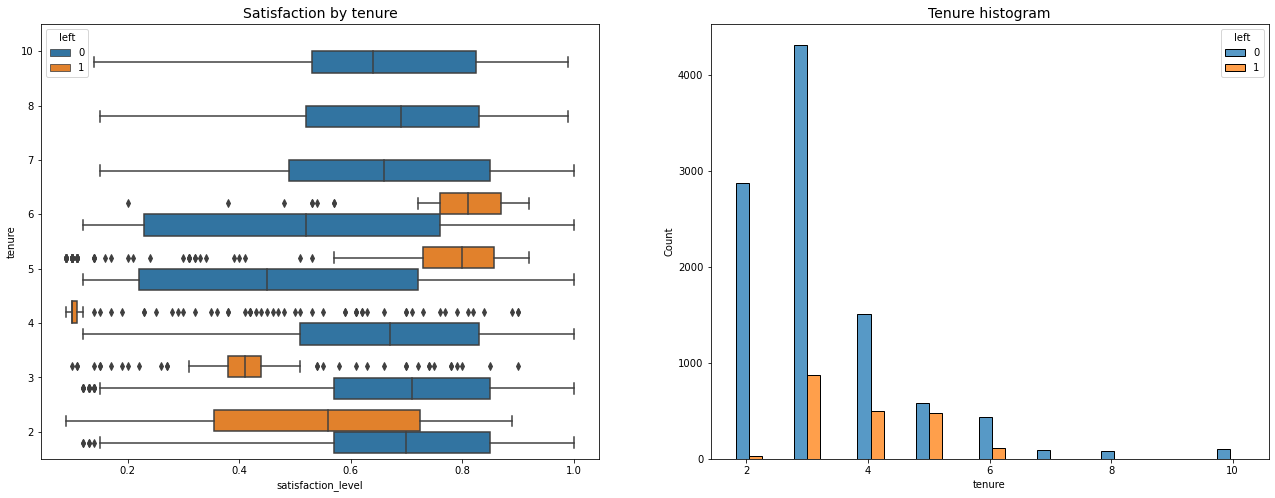

In [17]:
# Satisfaction by tenure
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# boxplot
sns.boxplot(data = df, x = 'satisfaction_level', y = 'tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize=14)

# histogram
sns.histplot(data=df, x = 'tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize=14)

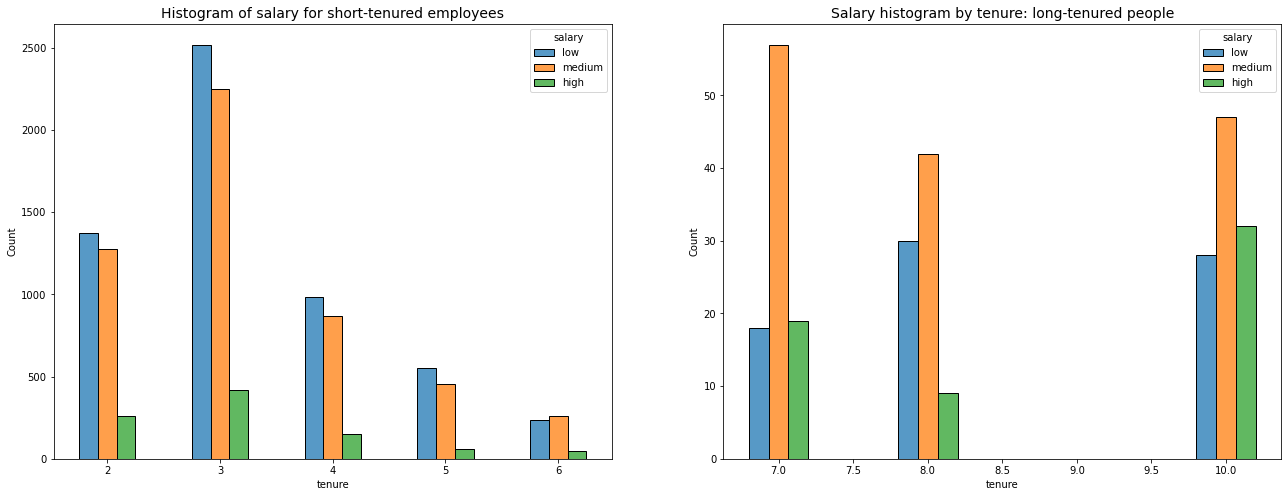

In [18]:
# Salary by tenure, long or short

fig, ax = plt.subplots(1, 2, figsize=(22,8))

# defining short tenure
tenure_short = df[df['tenure'] < 7]

# defining long tenure
tenure_long = df[df['tenure'] > 6]

# short tenure histogram
sns.histplot(data=tenure_short, x = 'tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Histogram of salary for short-tenured employees', fontsize=14)

# long tenure histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

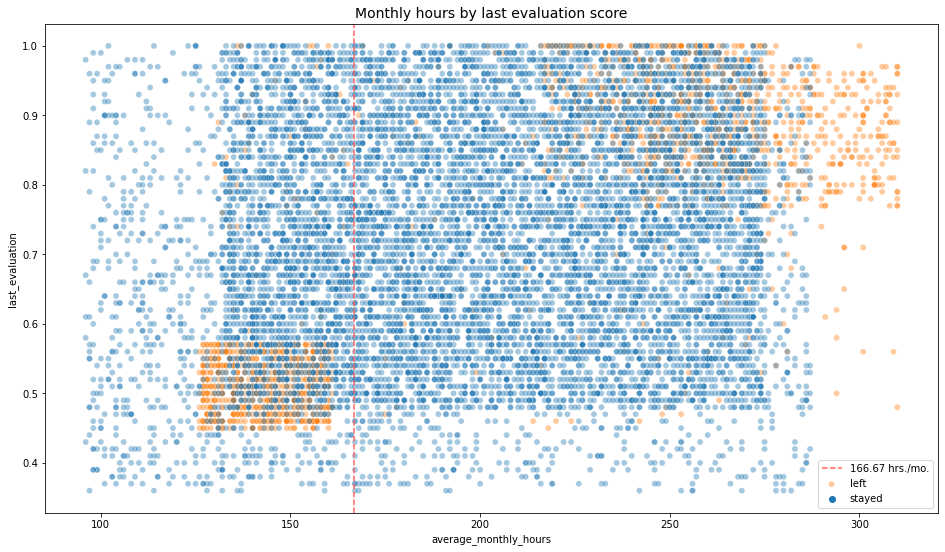

In [19]:
# Average monthly hour versus last evaluation score
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.7 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize=14)

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

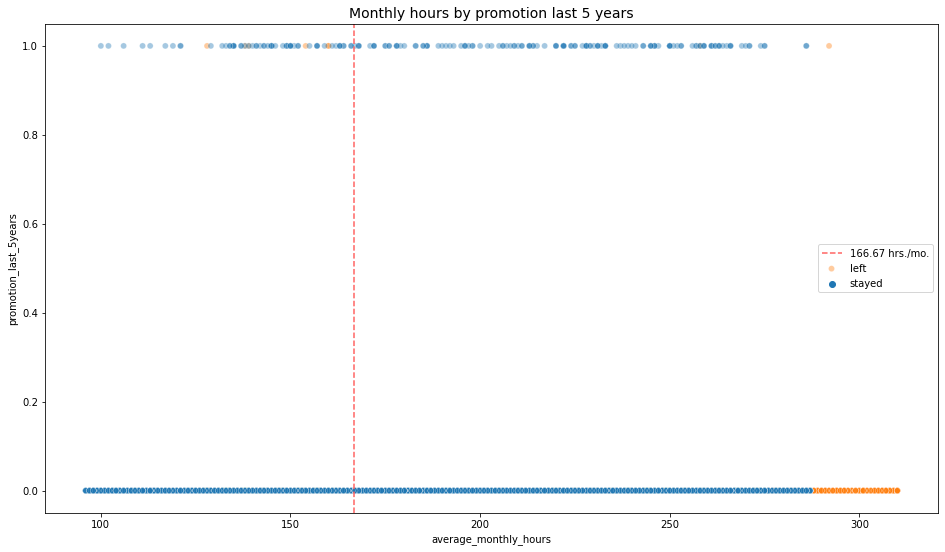

In [20]:
# Average monthly hours by promotion in the last 5 years
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize=14)

Text(0.5, 1.0, 'Counts of stayed and left by department')

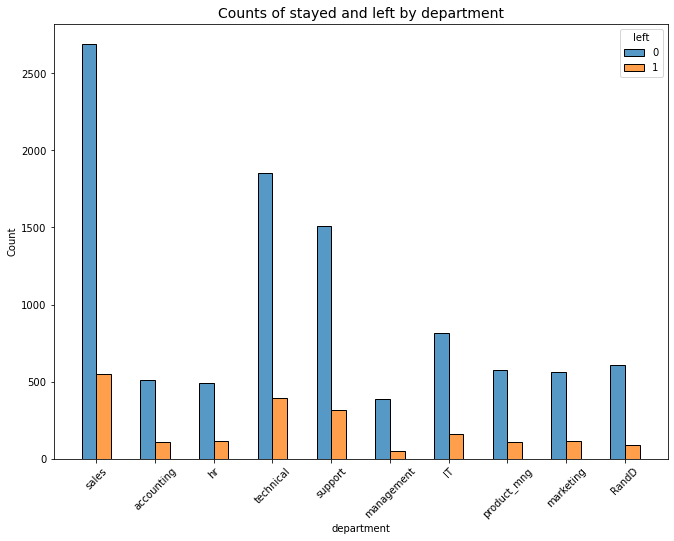

In [21]:
# Department distribution of employees who left and those who stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1,
             hue_order=[0,1], multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed and left by department', fontsize=14)

Text(0.5, 1.0, 'Correlation Heatmap')

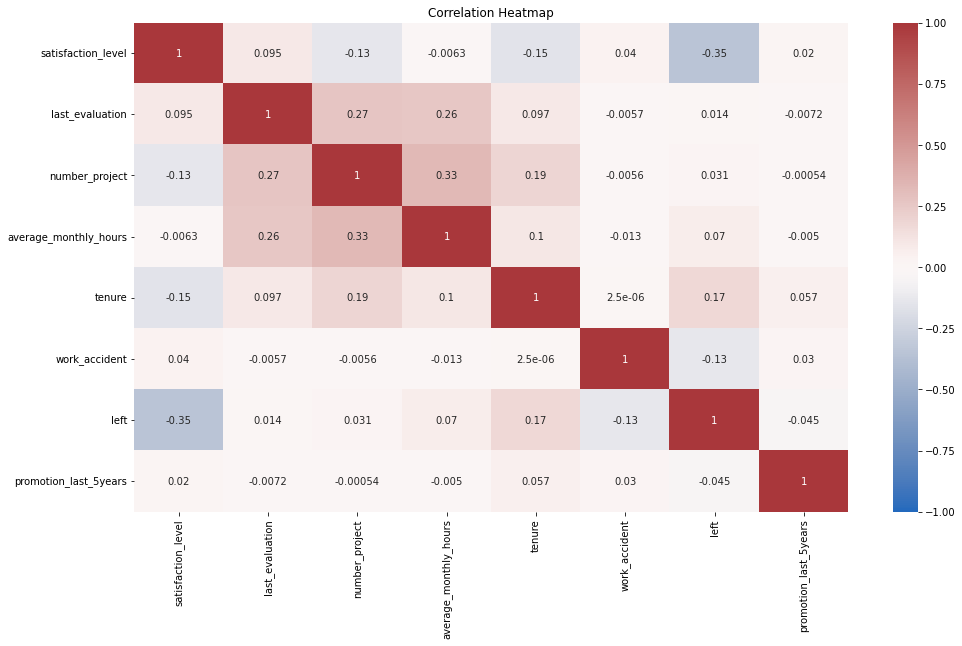

In [22]:
# Correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap')

### Insights

Based on the plots, it seems that employees are leaving the company due to poor management. Those who left tended to work longer hours, take on more projects, have lower satisfaction levels compared to other employees, and perform lower on evaluations and not receive promotions for their hard work. Based on the plots, it appears that employees tend to stay at the company if they have been employed there for longer than 6 years. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. While constructing my model, I did not notice anything odd.
2. For the model, I chose all variables from the dataset except for `left`, which I used as the dependent variable.
3. Each of the assumptions for my model are met.
4. My model fits the data very well, the AUC score was 0.96481 for the second round of the random forest.
5. The model could be improved by performing feature engineering to try and reduce data leakage.
6. I found myself turning to activities and reference guides found throughout the Google Advanced Data Analytics course.
7. At this time, I have no ethical concerns.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This task require classification because we are predicting if an employee will leave the company.

### Identify the types of models most appropriate for this task.

Decision Tree and Random Forest.

### Modeling Using a Tree-Based Model

Add as many cells as you need to conduct the modeling process.

In [23]:
# create dataset for modeling

data = df.copy()

# encode salary
data['salary'] = (data['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# get dummies for department

data = pd.get_dummies(data, drop_first=False)

# first few rows of new dataframe.
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Decision Tree - Round 1

In [24]:
# define target variable and split data
# target
y = data['left']

# rest of data
X = data.drop(['left'], axis=1)

# split data, 75-25

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=0)

In [25]:
# instantiate the model
tree = DecisionTreeClassifier(random_state=0)

# set parameters
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]}

# scoring
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [26]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 2.81 s, sys: 2.09 ms, total: 2.81 s
Wall time: 2.81 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [27]:
# Check for best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [28]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

In [29]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): name for model in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
    '''
    # dictionary that maps input metric to actual name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'}
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # extract metrics from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]})
    return table

In [30]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


#### Random Forest - Round 1

In [39]:
# Random Forest
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5,None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train)

In [ ]:
# path to save model
path = '/home/jovyan/work'

In [ ]:
# function to pickle the model
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
# function to read in the model
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        
    return model

In [ ]:
# write pickle
write_pickle(path, rf1, 'hr_rf1')

In [ ]:
# read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [ ]:
# best AUC score
rf1.best_score_

In [ ]:
# check best params
rf1.best_params_

In [ ]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')

print(tree1_cv_results)
print(rf1_cv_results)

In [ ]:
# function for getting all scores for a model's predictions
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]})
    
    return table

In [ ]:
# get predictions from test data
rf1_test_scores = get_scores('random forest 1 test', rf1, X_test, y_test)
rf1_test_scores

#### Feature Engineering

In [ ]:
# feature engineering
df2 = data.drop('satisfaction_level', axis=1)
df2.head()

In [ ]:
# define new variable overworked, representing those who work more than 175 hrs/week
df2['overworked'] = df2['average_monthly_hours']

df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

In [ ]:
# drop `average_monthly_hours` from df2
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

In [ ]:
# isolate target variable
y = df2['left']

# feature selection
X = df2.drop('left', axis=1)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=0)

#### Decision Tree - Round 2

In [ ]:
# make a decision tree
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree2.fit(X_train, y_train)

In [ ]:
# Check best parameters
tree2.best_params_

In [ ]:
# Check best scores
tree2.best_score_

In [ ]:
# results using make_results()
tree2_cv_results = make_results('decision tree 2 cv', tree2, 'auc')

print(tree1_cv_results)
print(tree2_cv_results)

#### Random Forest - Round 2

In [ ]:
# Random Forest 2
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5,None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf2.fit(X_train, y_train)

In [ ]:
# write pickle
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
# read pickle
read_pickle(path, 'hr_rf2')

In [ ]:
# best params
rf2.best_params_

In [ ]:
# best scores
rf2.best_score_

In [ ]:
# use make_results() to get cv scores
rf2_cv_results = make_results('random forest 2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

In [ ]:
# use get_scores() to get predictions from test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

#### Plotting the predictions and decision tree

In [ ]:
# Confusion Matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

# plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = rf2.classes_)
disp.plot(values_format='');

This model predicts slightly more false positives than false negatives, meaning that employees may be categorized as at risk of leaving the company, when that is not the truth. Overall, the model is still quite strong.

#### Decision Tree Plot

In [ ]:
# plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0: 'stayed', 1: 'left'}, filled=True)
plt.show()

#### Feature Importance - Decision Tree

In [ ]:
# determining importance
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

In [ ]:
# visualize importance
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title('DecisFeature Importances for Employee Leaving')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Random Forest feature importance

In [ ]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After performing feature engineering, the decision tree model achieved an AUC score of 95.9%, precision of 85.7%, recall of 90.3%, accuracy of 95.9%, and F1 of 87.9%. The random forest model slightly outperformed the decison tree, but results are equitable.

### Conclusion, Recommendations, Next Steps

Some recommendations to improve employee satisfaction include rewarding employees for working long hours, promoting employees with longer tenure, reducing the number of projects an employee is tasked with working on, evaluate employees fairly based on performance with less regard to hours worked, and holding company-wide meetings to get suggestions on how to improve morale among employees.